## Import necessary libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('1471093-atm_bank_dataset.csv')

## Drop unnecessary columns and handle missing values

In [2]:
df.drop(['atm_name', 'id', 'trans_date_set'], axis=1, inplace=True)

In [3]:
df.isnull().sum()

weekday                   0
festival_religion         0
working_day               0
holiday_sequence          0
trans_month               0
trans_year                0
prevweek_mean             0
total_amount_withdrawn    0
dtype: int64

## Univariate analysis function for numerical columns

In [4]:
def numerical_univariate(df):
    numerical_cols = df.select_dtypes(include='number').columns
    for col in numerical_cols:
        # Visualize histogram
        plt.figure(figsize=(10, 5))
        sns.histplot(df[col], bins=20)
        plt.title(f'Histogram - {col}')
        plt.show()

        # Visualize boxplot
        plt.figure(figsize=(10, 5))
        sns.boxplot(df[col])
        plt.title(f'Boxplot - {col}')
        plt.show()

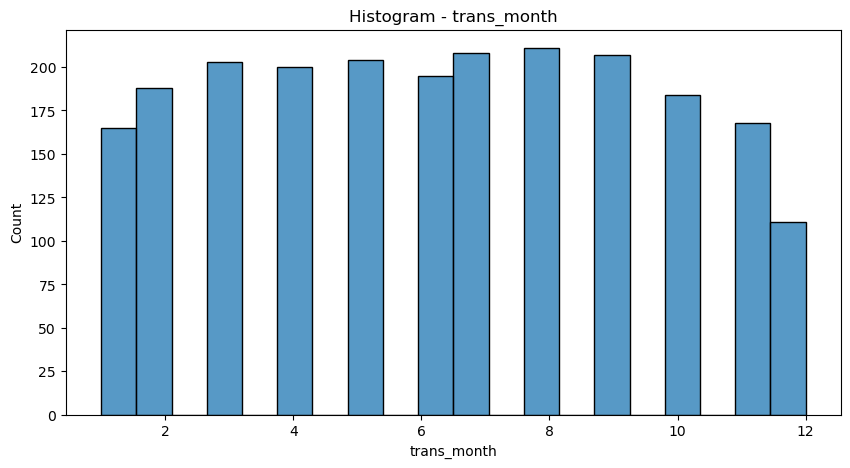

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


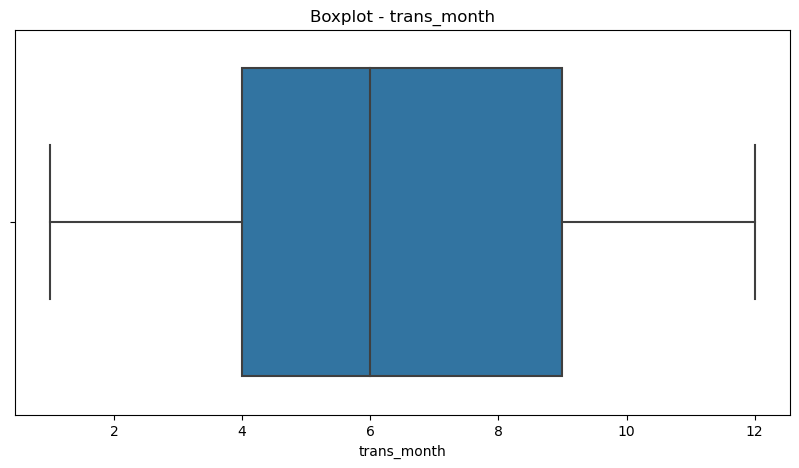

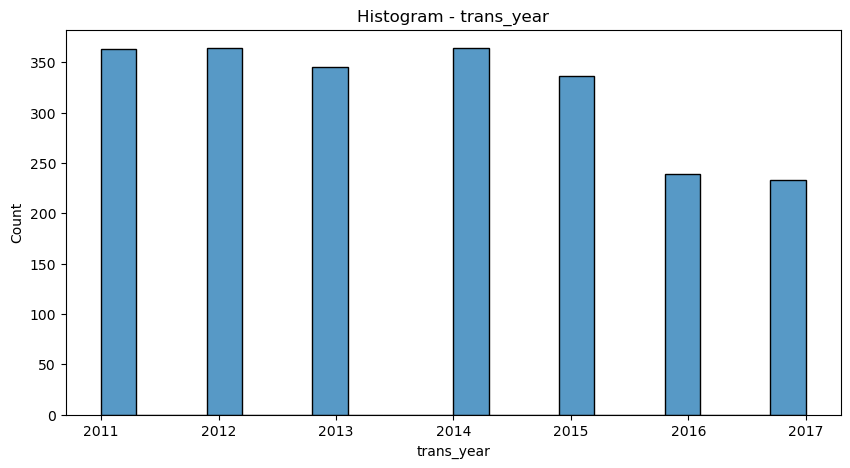

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


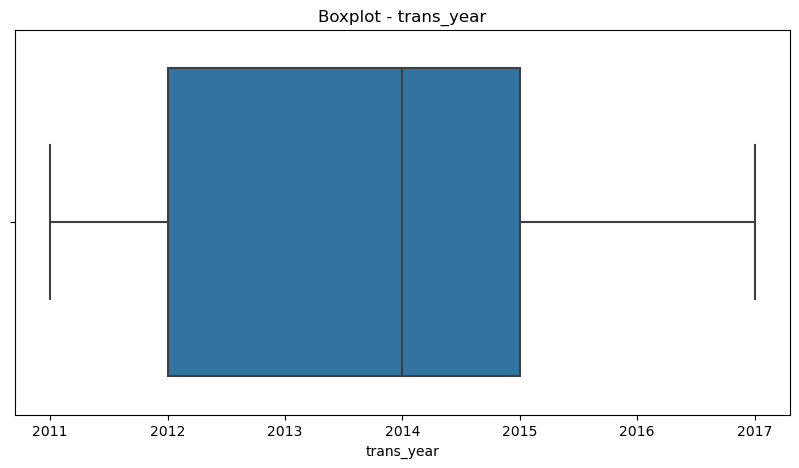

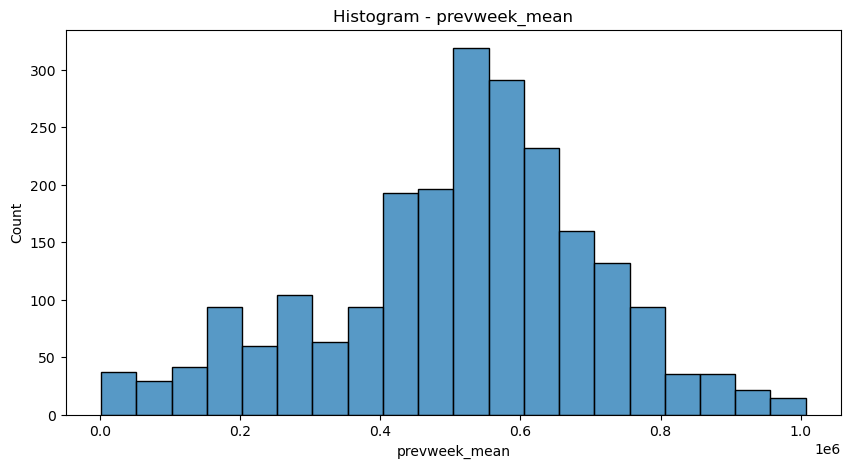

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


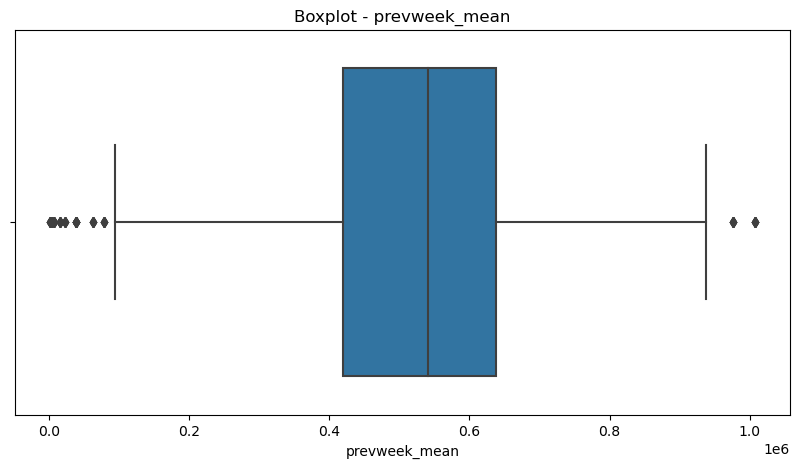

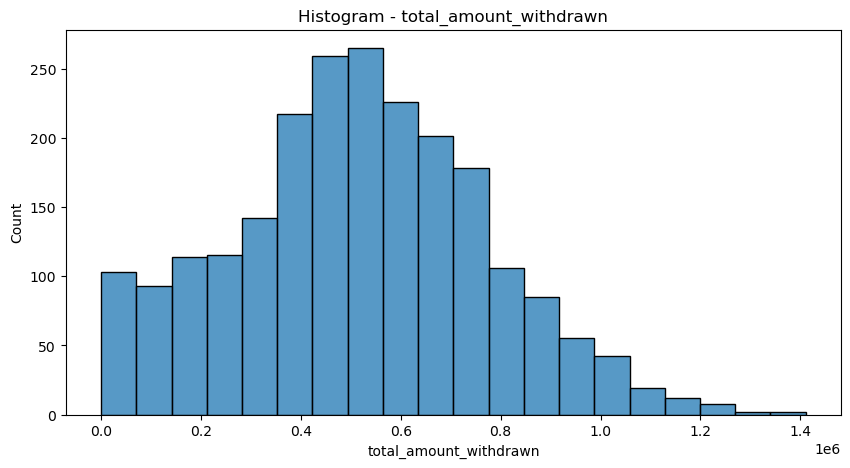

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


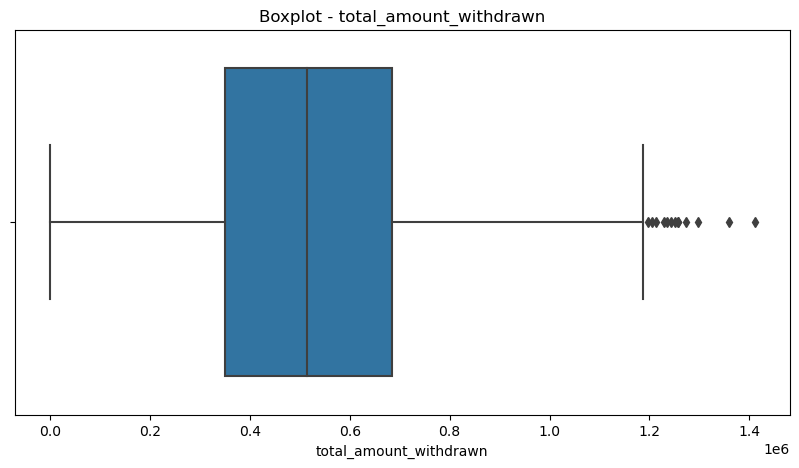

In [5]:
numerical_univariate(df)

## Univariate analysis function for categorical columns

In [6]:
def categorical_univariate(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        # Visualize countplot
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=col, palette='Set1')
        plt.title(f'Countplot - {col}')
        plt.show()

        # Visualize pie chart
        plt.figure(figsize=(10, 5))
        plt.pie(df[col].value_counts(), labels=df[col].value_counts().index)
        plt.title(f'Pie Chart - {col}')
        plt.show()

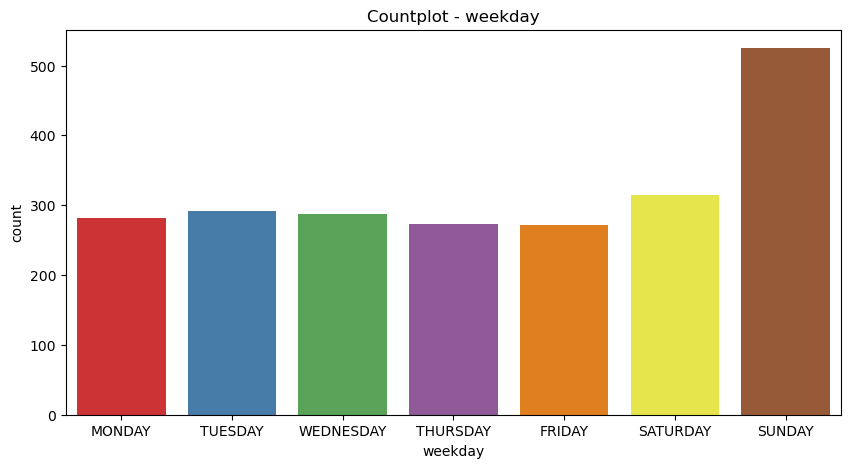

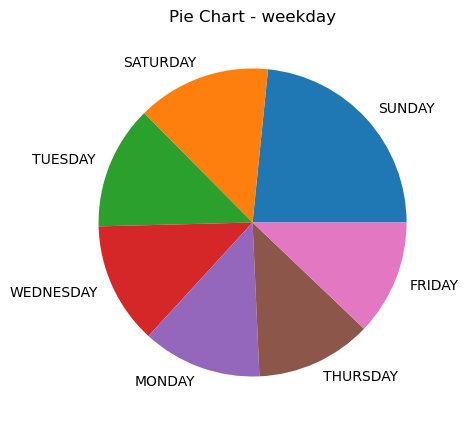

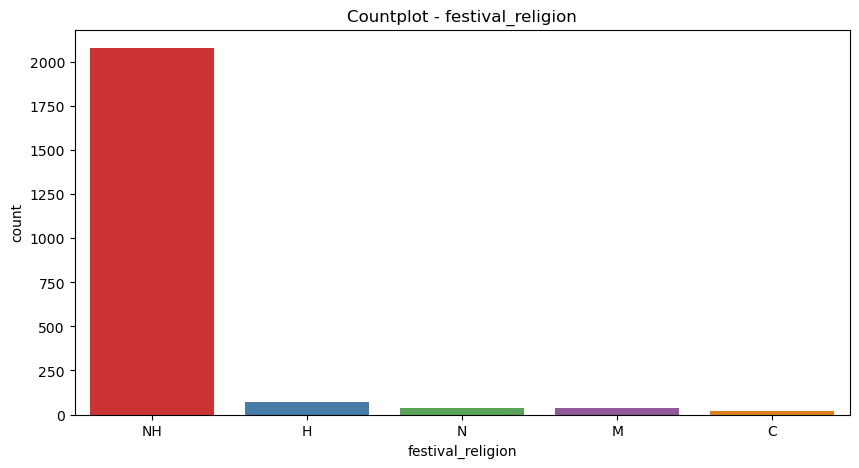

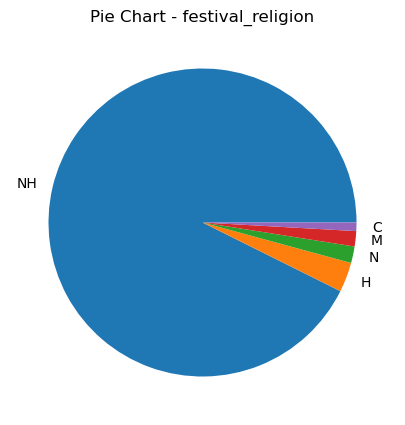

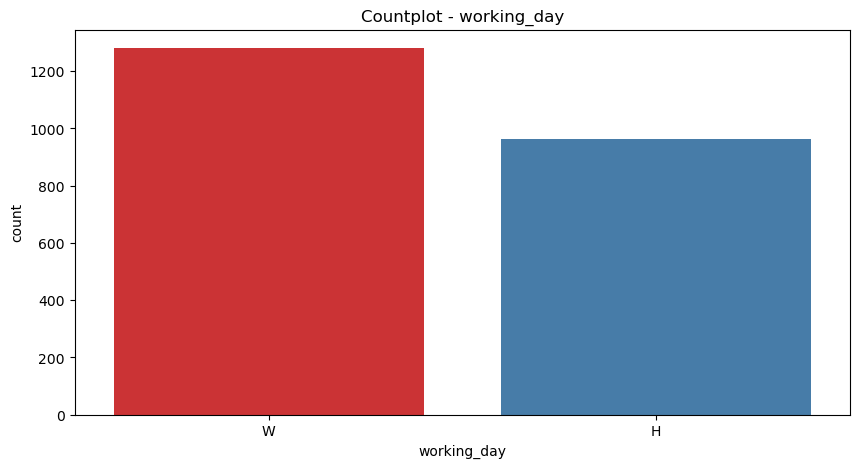

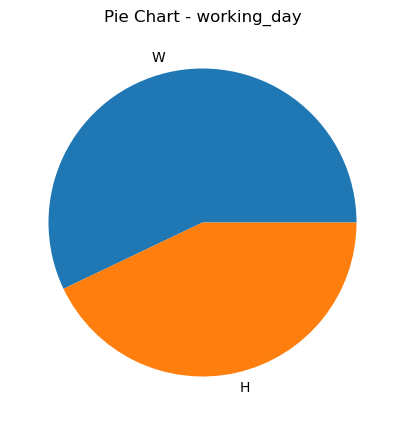

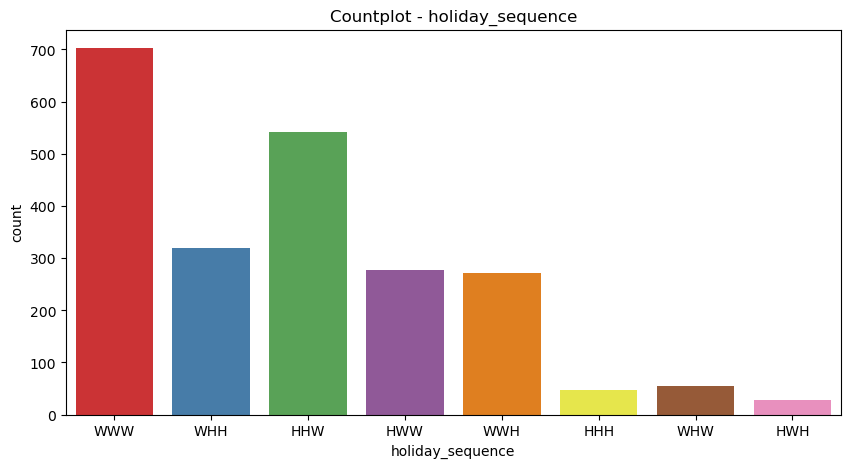

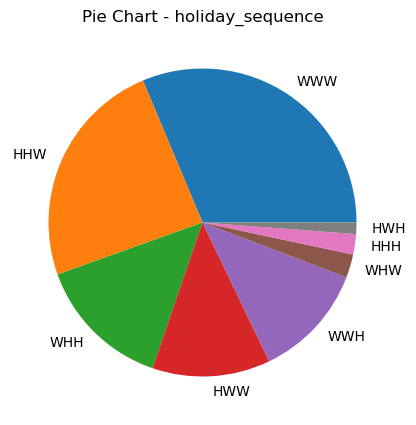

In [7]:
categorical_univariate(df)

## Bivariate analysis function for numerical columns

In [8]:
import itertools

In [9]:
columns = ['trans_year','prevweek_mean','total_amount_withdrawn']

In [10]:
def bivariate_nn(df):
    combs = list(itertools.combinations(columns, 2))
    for i in combs:
        # Visualize scatterplot
        plt.figure(figsize=(10, 5))
        sns.scatterplot(data=df, x=i[0], y=i[1], color='blue')
        plt.title(f"Scatterplot - {i[0]} vs {i[1]}")
        plt.show()

        # Visualize lineplot
        plt.figure(figsize=(10, 5))
        sns.lineplot(data=df, x=i[0], y=i[1], color='green')
        plt.title(f'Lineplot - {i[0]} vs {i[1]}')
        plt.show()

        # Visualize correlation heatmap
        plt.figure(figsize=(10, 5))
        sns.heatmap(df[list(i)].corr(), annot=True, cmap='coolwarm')
        plt.title(f'Correlation Heatmap between {i[0]} and {i[1]}')
        plt.show()

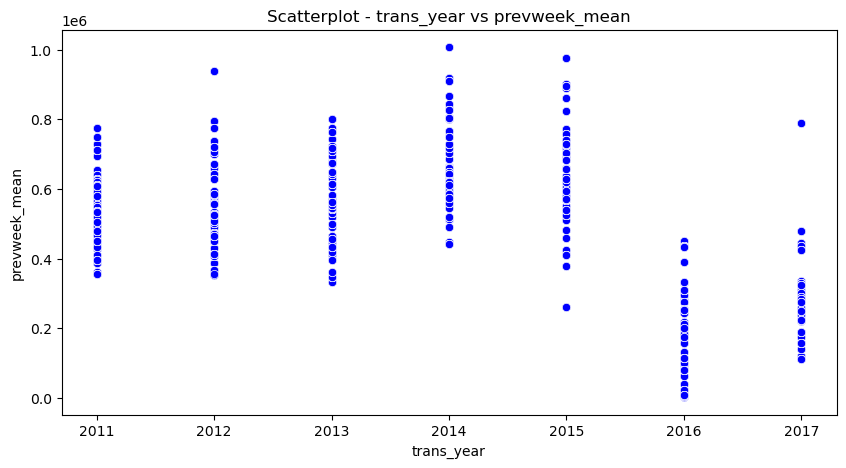

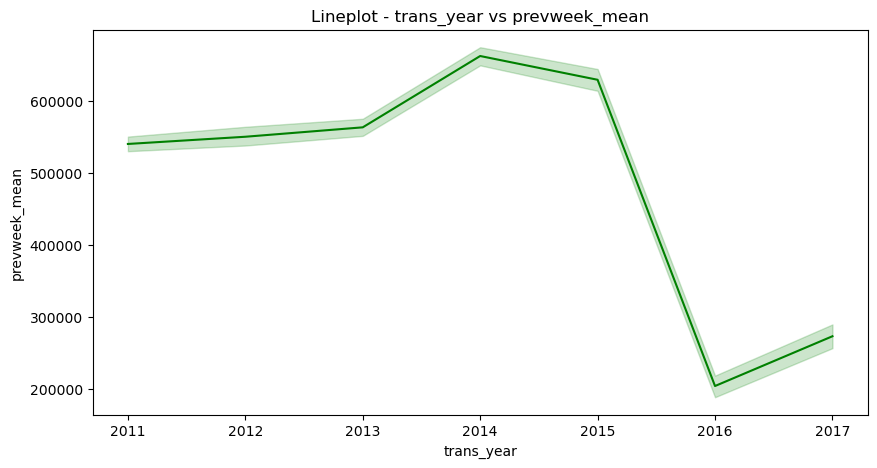

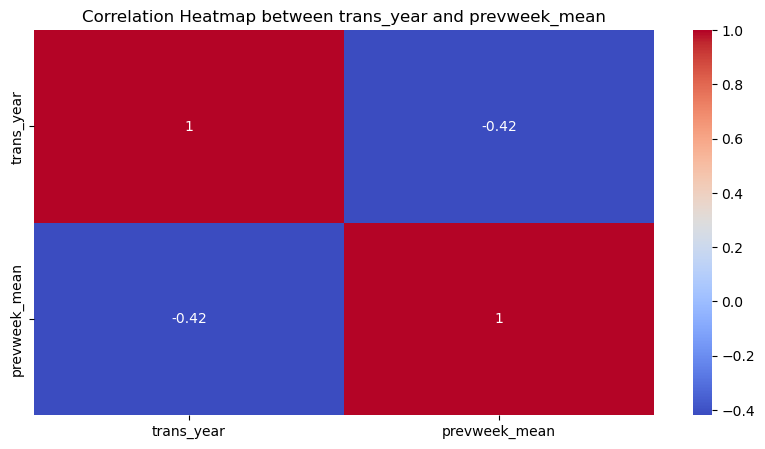

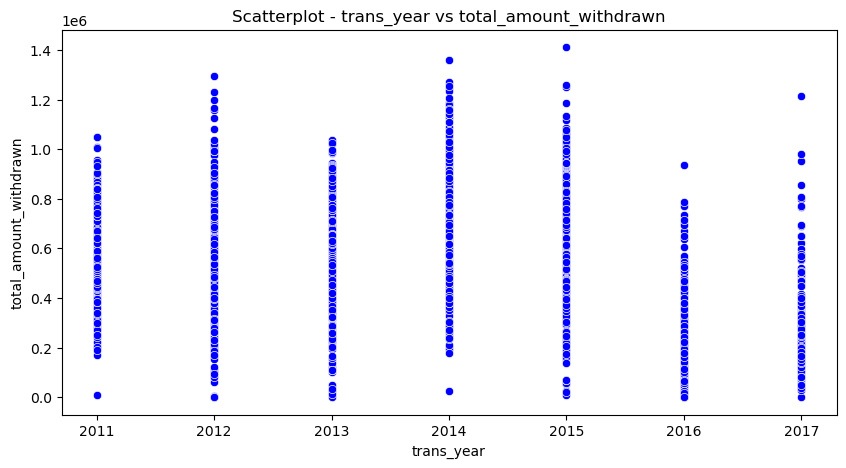

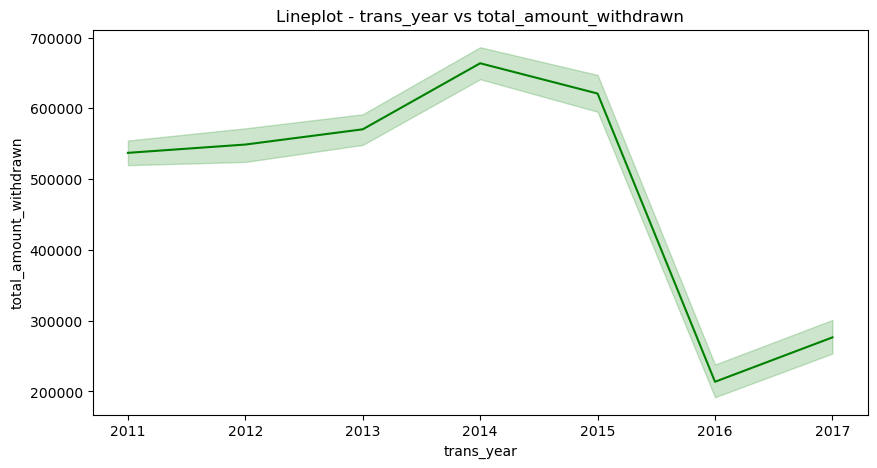

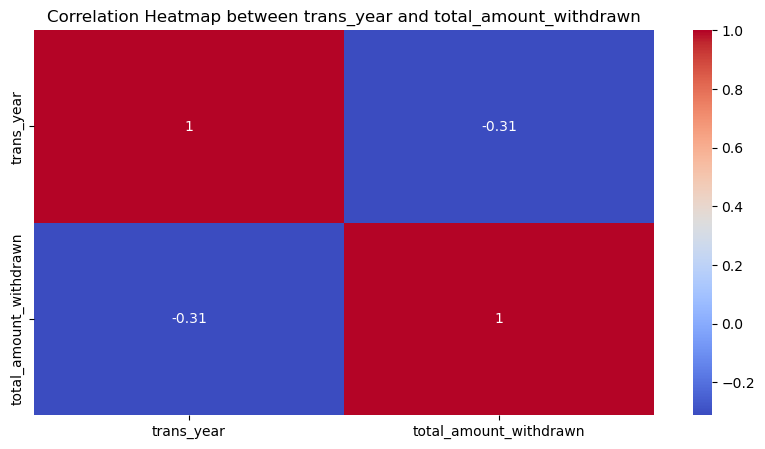

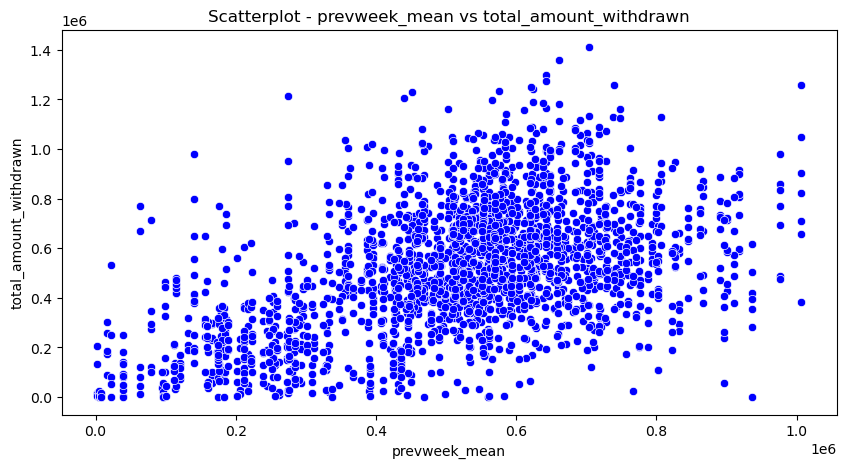

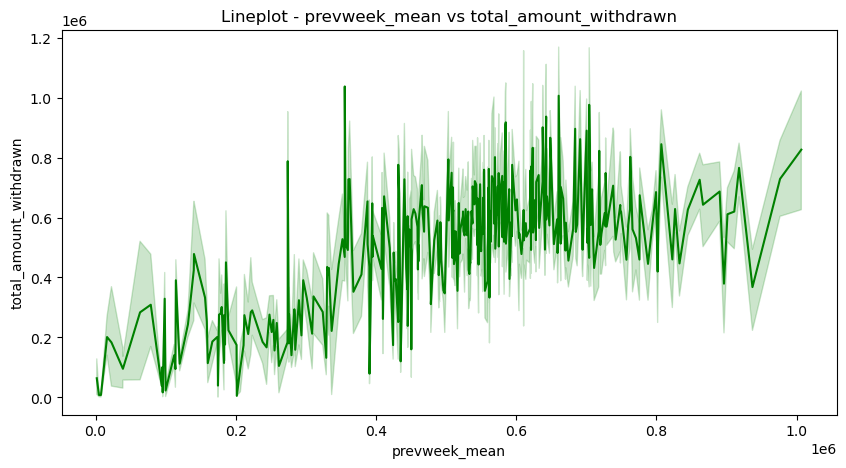

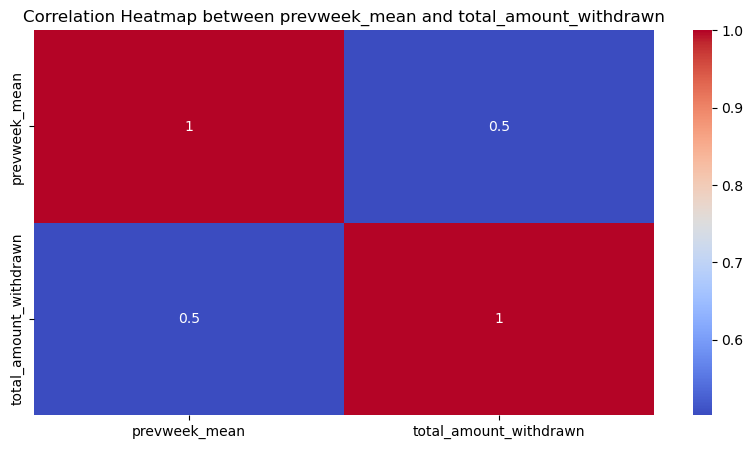

In [11]:
bivariate_nn(df)

## Bivariate analysis function for numerical and categorical columns

In [12]:
def bivariate_nc(df):
    numerical_cols = ['total_amount_withdrawn']
    categorical_cols = ['weekday', 'festival_religion', 'working_day', 'holiday_sequence']
    combs = list(itertools.product(numerical_cols, categorical_cols))

    for num_col, cat_col in combs:
        # Visualize boxplot
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df, x=cat_col, y=num_col)
        plt.xticks(rotation=90)
        plt.title(f'Boxplot - {num_col} vs {cat_col}')
        plt.show()

        # Visualize stripplot
        plt.figure(figsize=(10, 5))
        sns.stripplot(data=df, x=cat_col, y=num_col, jitter=True)
        plt.xticks(rotation=90)
        plt.title(f'Stripplot - {num_col} vs {cat_col}')
        plt.show()

        # Visualize pointplot
        plt.figure(figsize=(10, 5))
        sns.pointplot(data=df, x=cat_col, y=num_col, ci=None)
        plt.xticks(rotation=90)
        plt.title(f'Pointplot - {num_col} vs {cat_col}')
        plt.show()

        # Visualize barplot
        plt.figure(figsize=(10, 5))
        sns.barplot(data=df, x=cat_col, y=num_col, errorbar=None)
        plt.xticks(rotation=90)
        plt.title(f'Barplot - {num_col} vs {cat_col}')
        plt.show()

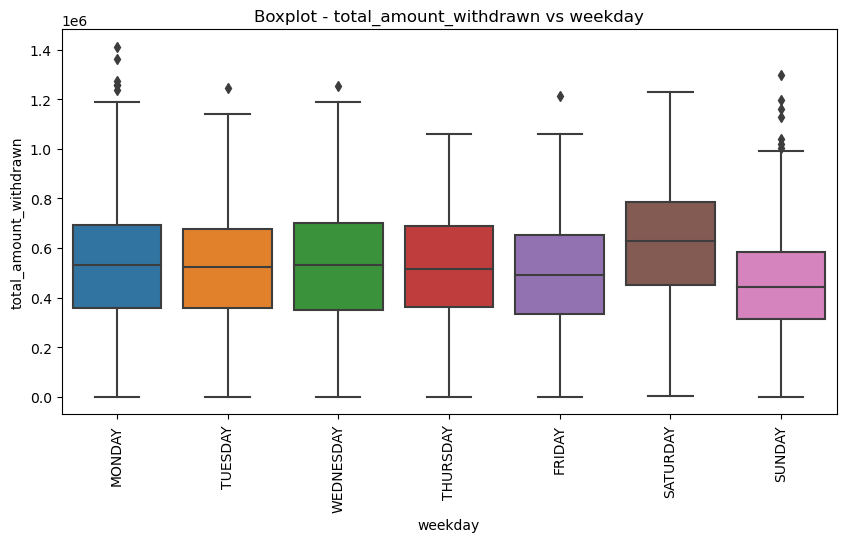

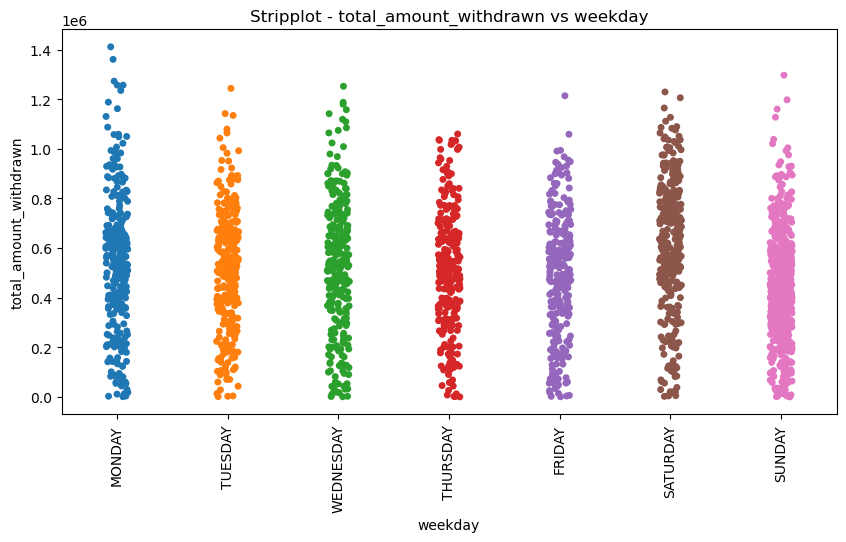

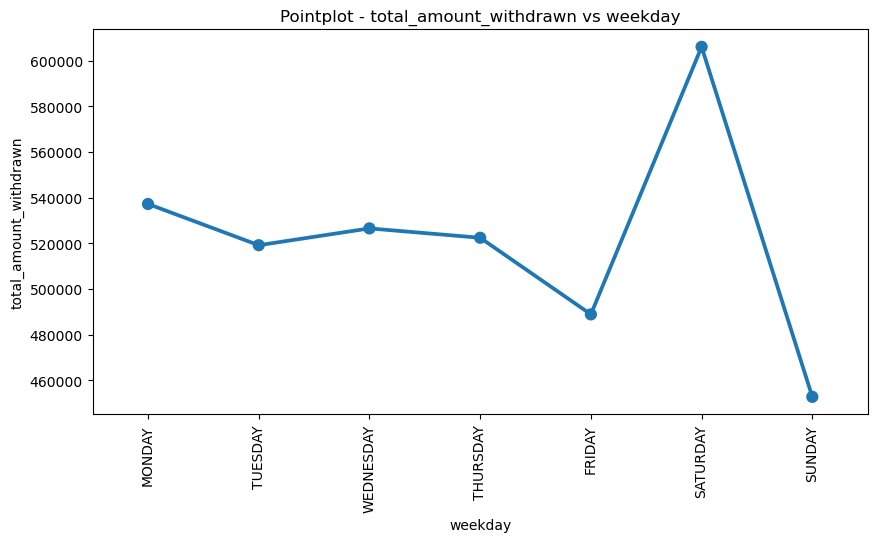

AttributeError: 'Rectangle' object has no property 'errorbar'

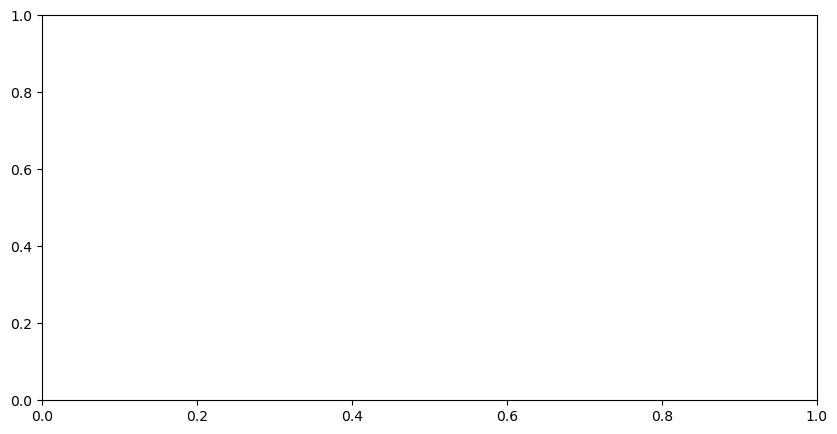

In [13]:
bivariate_nc(df)

In [14]:
df

,weekday,festival_religion,working_day,holiday_sequence,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,MONDAY,NH,W,WWW,1,2011,648600,897100
1,TUESDAY,NH,W,WWW,1,2011,648600,826000
2,WEDNESDAY,NH,W,WWW,1,2011,648600,754400
3,THURSDAY,NH,W,WWW,1,2011,648600,834200
4,FRIDAY,NH,W,WWW,1,2011,648600,575300
...,...,...,...,...,...,...,...,...
2239,MONDAY,NH,W,HWW,9,2017,276058,447400
2240,TUESDAY,NH,W,WWW,9,2017,276058,153800
2241,WEDNESDAY,NH,W,WWW,9,2017,276058,167100
2242,THURSDAY,NH,W,WWH,9,2017,276058,317400


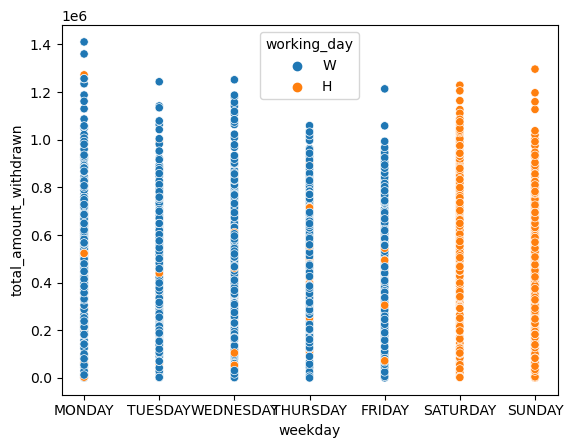

In [15]:
sns.scatterplot(x=df.weekday ,y=df.total_amount_withdrawn , hue = df.working_day)
plt.show()

In [16]:
df.groupby(by = 'weekday')['total_amount_withdrawn'].mean().sort_values()

weekday
SUNDAY       452687.809524
FRIDAY       488832.352941
TUESDAY      519134.707904
THURSDAY     522395.970696
WEDNESDAY    526497.909408
MONDAY       537197.864769
SATURDAY     606053.015873
Name: total_amount_withdrawn, dtype: float64

In [17]:
df.groupby(by = 'trans_year')['trans_year'].value_counts()

trans_year  trans_year
2011        2011          363
2012        2012          364
2013        2013          345
2014        2014          364
2015        2015          336
2016        2016          239
2017        2017          233
Name: trans_year, dtype: int64

In [18]:
df.groupby(by = 'trans_year')['total_amount_withdrawn'].max()

trans_year
2011    1049600
2012    1296600
2013    1035900
2014    1360200
2015    1410700
2016     935500
2017    1213600
Name: total_amount_withdrawn, dtype: int64

In [19]:
for i in df.trans_year.unique() :
    print("min in withdrawn" , i ,'---' , df[df.trans_year == i]['total_amount_withdrawn'].min())
    print("max in withdrawn" , i ,'---' , df[df.trans_year == i]['total_amount_withdrawn'].max())
    print()

min in withdrawn 2011 --- 8100
max in withdrawn 2011 --- 1049600

min in withdrawn 2012 --- 400
max in withdrawn 2012 --- 1296600

min in withdrawn 2013 --- 2600
max in withdrawn 2013 --- 1035900

min in withdrawn 2014 --- 24000
max in withdrawn 2014 --- 1360200

min in withdrawn 2015 --- 10000
max in withdrawn 2015 --- 1410700

min in withdrawn 2016 --- 100
max in withdrawn 2016 --- 935500

min in withdrawn 2017 --- 2000
max in withdrawn 2017 --- 1213600



In [20]:
df.groupby(by = 'working_day')['working_day'].value_counts()

working_day  working_day
H            H               963
W            W              1281
Name: working_day, dtype: int64

### Points to be noted

- total no. of ATM transactions less in 2016 and 2017
- more no. of withdrawals present for amount between 40000 to 75000 approx
- prevweek_mean and total_amount_withdrawn almost follow the same trend
- Sunday and Saturday withdrawals are more compared to other weekdays
- On NH festive religion day more withdrawals are present
- on W - working day more withdrawals are present
- WWW , HHW these working sequences have got more withdrawals
- prevweek_mean is relatively less in 2016 , 2017
- total_amount_withdrawn is also relatively less in 2016 , 2017 when compared with other years
- Highest amount withdrawals happening during saturday

### Some understanding
- Digitalization might be the main reason for decrease in ATM withdrawals count during 2016 and 2017 as it came into picture in 2015 effectively .
- Saturdays and Sundays seem to have more withdrawals than other week days .